# NumPy = Numerical Python

Numpy is an important package for numerical computing in Python. Most computational packages use numpy multidimensional array as the main structure to store and manipulate data.

Numpy is a large topic. In this lecture, **we cover**:

- Fast vectorized array operations for data manipulation, cleaning, subsetting, filtering, transformation, and any other kinds of computation.
- Popular methods on array object like sorting, unique, and set operations
- Efficient descriptive statistic, and summarizing data
- Merging and joining together datasets
- Expressing conditional logic as array expression instead of loops
- Groupd-wise data manipulation (aggregration, transformation, function application)

In [1]:
import numpy as np

# The Numpy ndarray: A Multidimensional Array Object

## Creating ndarrays

To create an array, use the *array* function. This function accept any sequence-like object and produces a new NumPy array containing the passed data.

In [2]:
data1 = [1, 2, 3]
array1 = np.array(data1) # data passed in is a list
array1

array([1, 2, 3])

In [3]:
data2 = (4, 5, 6)
array2 = np.array(data2) # data passed in is a tuple
array2

array([4, 5, 6])

In [4]:
type(array2)

numpy.ndarray

Obviously, we can create a numpy array directly as follow: 

In [5]:
array3 = np.array("python")
array3

array('python', dtype='<U6')

If we passed a nested sequences to the *array* function, a multidimensional array is created

In [6]:
data4 = [[1, 2, 3], [4, 5, 6]]
array4 = np.array(data4)
array4

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

We see that *data4* is a list of 2 element where each element is a list of 3 elements. Thus, *array4* is a *2x3* array (or matrix). We can check the number of dimensions of an array and its shape using

In [8]:
array4.ndim # array4 has 2 dimension

2

In [9]:
array4.shape # array 2 rows and 3 columns, the shape is returned in a 2-d tuple

(2, 3)

### Some useful functions for creating new special arrays

In [10]:
# Create array of 0s
np.zeros([3, 5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [11]:
# Create array of 1s
np.ones([5, 3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [12]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
# Create an array of range
np.arange(10, 100, 2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [14]:
# Create an identity matrix
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Arithmetic with Numpy Arrays

When numerical data are stored in numpy arrays, we can perform batch operations on data (like matrix operations in math) without writing any loops. We call this feature vectorization. Any arithmetic operations between equal-size arrays applies the operation element-wise. For example, we have

In [15]:
my_list = [[1, 2, 3], [4, 5, 6]]

Then, we want to create a new list where its elements are elements of my_list squared as

In [16]:
[[i**2 for i in item ] for item in my_list]

[[1, 4, 9], [16, 25, 36]]

Using numpy array and vectorizaton we can do the same but much simpler as 

In [17]:
array = np.array(my_list)

In [18]:
array

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
array * array

array([[ 1,  4,  9],
       [16, 25, 36]])

Other arithmetic operations

In [20]:
array - array

array([[0, 0, 0],
       [0, 0, 0]])

In [21]:
array ** 3

array([[  1,   8,  27],
       [ 64, 125, 216]], dtype=int32)

In [22]:
1 // array

array([[1, 0, 0],
       [0, 0, 0]], dtype=int32)

We can compare two arrays of the same shape element-wise. The result is a boolean array.

In [23]:
array_2 = np.array([[2, 4, 0], [5, 1, 9]])
array_2

array([[2, 4, 0],
       [5, 1, 9]])

In [24]:
array

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
array_2 > array

array([[ True,  True, False],
       [ True, False,  True]])

## Basic Indexing and Slicing

For one dimensional numpy, slicing is similar to Python lists

In [26]:
array = np.arange(10)

In [27]:
array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
array[0]

0

In [29]:
array[-2]

8

In [30]:
array[:3]

array([0, 1, 2])

In [31]:
array[-3:]

array([7, 8, 9])

In [32]:
array[2:6]

array([2, 3, 4, 5])

We should notice that array slices are **views** on the original array. This means that the data is not copied, and any modification to the view will be reflected in the source array. For example,

In [33]:
array_slice = array[2:6]

In [34]:
array_slice

array([2, 3, 4, 5])

In [35]:
array_slice[0] = 99

In [36]:
array_slice

array([99,  3,  4,  5])

In [37]:
array

array([ 0,  1, 99,  3,  4,  5,  6,  7,  8,  9])

If we want a copy of a slice, we need to do it explicitly as 

In [38]:
array_slice_copied = array[-3:].copy()

In [39]:
array_slice_copied

array([7, 8, 9])

In [40]:
array_slice_copied[:] = 99

In [41]:
array_slice_copied

array([99, 99, 99])

In [42]:
array

array([ 0,  1, 99,  3,  4,  5,  6,  7,  8,  9])

For higher dimensional array, for example, 2-dimensional arrays, the elements at each index are no longer scalars but rather one-dimensional arrays.

In [43]:
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [44]:
array_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [45]:
array_2d[2]

array([7, 8, 9])

We can select an individual element by two ways:

In [46]:
array_2d[1]

array([4, 5, 6])

In [47]:
# Access recursively the element at row 1, column 1
array_2d[1][1]

5

In [48]:
# Comma separated list
array_2d[1, 1]

5

### Indexing with slices

In [49]:
array_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [50]:
# Return the first row
array_2d[0]

array([1, 2, 3])

In [51]:
# Return the first two row
array_2d[1:]

array([[4, 5, 6],
       [7, 8, 9]])

In [52]:
# Return the second column
array_2d[:, 2]

array([3, 6, 9])

In [53]:
# Return the square submatrix at the upper right corner
array_2d[:2, -2:]

array([[2, 3],
       [5, 6]])

**Remember again, slice is a view. Modify a slice changes the orginal array.**

In [54]:
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [55]:
array_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [56]:
array_2d[:2, :2] = 99

In [57]:
array_2d

array([[99, 99,  3],
       [99, 99,  6],
       [ 7,  8,  9]])

In [58]:
x = np.array([[1,2,3], [4,5,6,7]])

In [59]:
type(x[0])

list

In [60]:
array_2d.dtype

dtype('int32')

In [61]:
array_2d

array([[99, 99,  3],
       [99, 99,  6],
       [ 7,  8,  9]])

In [62]:
array_2d[0,0] = 0

In [63]:
array_2d

array([[ 0, 99,  3],
       [99, 99,  6],
       [ 7,  8,  9]])

## Comparison Operators

In [64]:
array = np.array([1, 2, 3, 4, 5, 6])

In [65]:
array

array([1, 2, 3, 4, 5, 6])

In [66]:
array > 3

array([False, False, False,  True,  True,  True])

In [67]:
array >= 3

array([False, False,  True,  True,  True,  True])

In [68]:
array == 3

array([False, False,  True, False, False, False])

In [69]:
array != 3

array([ True,  True, False,  True,  True,  True])

## Boolean Arrays

In [70]:
a = np.array([[2, -7, 1], [-4, 3, 8], [5, 0, -6]])

In [71]:
a

array([[ 2, -7,  1],
       [-4,  3,  8],
       [ 5,  0, -6]])

In [72]:
# Which number is positive ?
(a > 0).sum()

5

In [73]:
# How many negative number ?
(a < 0).sum()

3

In [74]:
a == 0

array([[False, False, False],
       [False, False, False],
       [False,  True, False]])

In [75]:
# Are there any number equal to 0 ?
(a == 0).any()

True

In [76]:
a < 8

array([[ True,  True,  True],
       [ True,  True, False],
       [ True,  True,  True]])

In [77]:
# Are all value less than 8 ?
(a < 8).all()

False

## Boolean Indexing

In [78]:
a = np.array([-2, -1, 0, 1, 2])

In [79]:
# Boolean mask
mask = a > 0

In [80]:
mask

array([False, False, False,  True,  True])

In [81]:
# Pass the boolean mask to index
a[mask]

array([1, 2])

In [82]:
# Create a random 2 dimensional array
b = np.random.randint(1, 10, (3, 3))

In [83]:
b

array([[1, 8, 3],
       [3, 6, 7],
       [9, 4, 9]])

In [84]:
# Index with a boolean mask
b <= 4

array([[ True, False,  True],
       [ True, False, False],
       [False,  True, False]])

In [85]:
# Index with a boolean mask
b[b <= 4]

array([1, 3, 3, 4])

In [86]:
# We can set values of an array with boolean mask
b[b==9] = 0

In [87]:
b

array([[1, 8, 3],
       [3, 6, 7],
       [0, 4, 0]])

In [88]:
a = np.array([1, 3, 5, 7, 9])

In [89]:
a

array([1, 3, 5, 7, 9])

In [90]:
np.where(a > 4)

(array([2, 3, 4], dtype=int64),)

## Fancy Indexing

If we want to access elements at non consecutinuous index of a numpy array, we use fancy indexing. For example, 

In [91]:
a = np.random.randint(0, 9, 10)

In [92]:
a

array([4, 3, 4, 3, 0, 1, 3, 0, 7, 6])

We retrieve elements at even indicies of the above array as

In [93]:
a[[0, 1, -1]]

array([4, 3, 6])

Fancy indexing also works with multiple dimensions arrays

In [94]:
b = np.arange(9).reshape(3,3)

In [95]:
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

To get the elements at specific locations, we pass in two tuples. The first one indicates the row indicies and the second one determines column indicies.

In [96]:
# Get elements at the four corners of the array, the indicies of those position are (0, 0); (0, 2); (2, 0); (2, 2)
row_indicies = (0, 0, 2, 2)
column_indicies = (0, 2, 0, 2)
b[row_indicies, column_indicies]

array([0, 2, 6, 8])

We can combine fancy indexing with other indexing methods to get desired elements.

In [97]:
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [98]:
# Simple + fancy
b[1, [0, 2]]

array([3, 5])

In [99]:
# Slicing + fancy
b[[0, 2], -2:]

array([[1, 2],
       [7, 8]])

In [100]:
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [101]:
c = b[[True, False, True]]

In [102]:
c

array([[0, 1, 2],
       [6, 7, 8]])

In [103]:
c[:,[0, 2]]

array([[0, 2],
       [6, 8]])

In [104]:
# Boolean + fancy
b[[True, False, True]][:, [0, 2]]

array([[0, 2],
       [6, 8]])

We can create a new array by using fancy indexing

In [105]:
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [106]:
b[[0, 0, 1, 1, 2, 2]]

array([[0, 1, 2],
       [0, 1, 2],
       [3, 4, 5],
       [3, 4, 5],
       [6, 7, 8],
       [6, 7, 8]])

We can modify data of array using fancy indexing

In [107]:
b = np.arange(9).reshape(3, 3)
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [108]:
b[[0, 1], [2, 0]] = 99

In [109]:
b

array([[ 0,  1, 99],
       [99,  4,  5],
       [ 6,  7,  8]])

In [110]:
b = np.arange(9).reshape(3,3)

In [111]:
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [112]:
b[[True, False, True]]

array([[0, 1, 2],
       [6, 7, 8]])

In [113]:
b[[True, False, True]][:, [0, 2]]

array([[0, 2],
       [6, 8]])

# Universal Function

## Array Arithmetic

In [114]:
x = np.arange(5)
print(x)
print(x + 2)
print(x - 2)
print(x * 2)
print(x / 2)
print(x // 2)
print(x ** 2)
print(x % 2)

[0 1 2 3 4]
[2 3 4 5 6]
[-2 -1  0  1  2]
[0 2 4 6 8]
[0.  0.5 1.  1.5 2. ]
[0 0 1 1 2]
[ 0  1  4  9 16]
[0 1 0 1 0]


## Absolute value

In [115]:
x = np.array([-2, -1, 0, 1, 2])
print(x)
print(np.abs(x))

[-2 -1  0  1  2]
[2 1 0 1 2]


The numpy absolute function can work with complex numbers and return the magnitude of it.

In [116]:
x = np.array([-1 + 1j, 2 - 2j, 3 + 4j])
print(x)
print(np.abs(x))

[-1.+1.j  2.-2.j  3.+4.j]
[1.41421356 2.82842712 5.        ]


## Trigonometric functions

In [117]:
np.pi

3.141592653589793

In [118]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 5)
x

array([-6.28318531, -3.14159265,  0.        ,  3.14159265,  6.28318531])

In [119]:
y = np.sin(x)
y

array([ 2.4492936e-16, -1.2246468e-16,  0.0000000e+00,  1.2246468e-16,
       -2.4492936e-16])

In [120]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

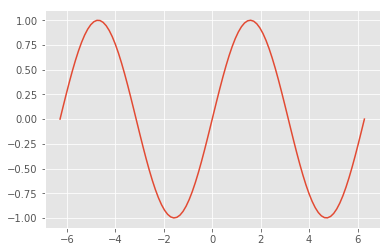

In [121]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y)

## Exponents and logarithms

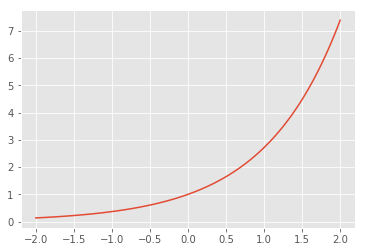

In [122]:
x = np.linspace(-2, 2, 100)
y = np.exp(x)
plt.plot(x, y)

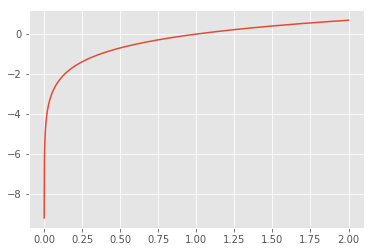

In [123]:
x = np.linspace(0.0001, 2, 1000)
y = np.log(x)
plt.plot(x, y)

We can combine those functions to calculate complex math functions

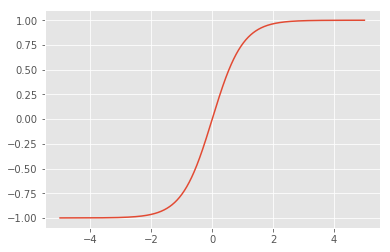

In [124]:
x = np.linspace(-5, 5, 1000)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x, y)

# Aggregations: Sum, Min, Max

## Summing the Values in an Array

Given an array

In [125]:
a = np.random.randn(5)
a

array([-0.22588199, -1.51633948, -2.80964714,  0.12997554,  0.57969312])

We can use the sum function of python or use the method of numpy as follow

In [126]:
sum(a)

-3.8421999318204434

In [127]:
a.sum()

-3.8421999318204434

It is recommended to use the numpy version, because it is computed much more quickly 

In [128]:
big_array = np.random.randn(1000000)
%time sum(big_array)
%time big_array.sum()

Wall time: 118 ms
Wall time: 4 ms


1298.821748315366

## Min and Max

Again, python has built in mix and max function. However, numpy version is better.

In [129]:
a = np.random.randn(5)
a

array([-0.26786334,  1.14854453, -0.48105238,  1.32927505,  0.46079848])

In [130]:
a.min()

-0.481052376778339

In [131]:
a.max()

1.3292750457487355

## Multi dimensional aggregates

When we have two (or more) dimensionals array, we can choose which dimension to perform aggregration.

In [132]:
a = np.random.randn(3, 4)
a

array([[ 0.47225904, -0.51286761,  0.99689973,  0.62979671],
       [ 0.96290322, -0.7397469 ,  1.68022493,  1.03611129],
       [ 3.18527376,  0.23037549,  0.28692393, -0.26069011]])

In [133]:
print(a.sum()) # sum all of the elements
print(a.sum(axis = 0)) # sum on column
print(a.sum(axis = 1)) # sum on row

7.96746347027033
[ 4.62043601 -1.02223902  2.96404859  1.40521789]
[1.58608787 2.93949254 3.44188306]


In [134]:
print(a.min())
print(a.min(axis = 0)) #column
print(a.min(axis = 1)) #row

-0.7397468994752066
[ 0.47225904 -0.7397469   0.28692393 -0.26069011]
[-0.51286761 -0.7397469  -0.26069011]


In [135]:
print(a.max())
print(a.max(axis = 0))
print(a.max(axis = 1))

3.1852737585039383
[3.18527376 0.23037549 1.68022493 1.03611129]
[0.99689973 1.68022493 3.18527376]


## Sorting

To return a sorted version of the array without modifying the input, you can use *np.sort*

In [136]:
a = np.random.randn(5)
a

array([ 1.05252522,  0.29288483, -0.2178901 ,  0.07781274, -0.3868615 ])

In [137]:
np.sort(a)

array([-0.3868615 , -0.2178901 ,  0.07781274,  0.29288483,  1.05252522])

In [138]:
a

array([ 1.05252522,  0.29288483, -0.2178901 ,  0.07781274, -0.3868615 ])

To sort the array in-place, calling the *sort* method on the array

In [139]:
a = np.random.randn(5)
a

array([-0.42070186, -0.72067056, -0.02014814,  0.64224777,  1.54886517])

In [140]:
a.sort()

In [141]:
a

array([-0.72067056, -0.42070186, -0.02014814,  0.64224777,  1.54886517])

A related function is *argsort*, which instead returns the indices of the sorted elements:

In [142]:
a = np.random.randn(5)
a

array([ 0.53114406, -0.1753328 ,  1.60161468, -0.26478827, -0.38879167])

In [143]:
np.argsort(a)

array([4, 3, 1, 0, 2], dtype=int64)

In [144]:
a[np.argsort(a)]

array([-0.38879167, -0.26478827, -0.1753328 ,  0.53114406,  1.60161468])

In [145]:
np.argmin(a)

4

In [146]:
np.argsort(a)

array([4, 3, 1, 0, 2], dtype=int64)

In [147]:
a.argsort()

array([4, 3, 1, 0, 2], dtype=int64)

## Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the axis argument. For example:

In [148]:
a = np.random.randint(0, 9, (4, 5))
a

array([[7, 4, 1, 4, 1],
       [1, 7, 0, 4, 0],
       [2, 5, 5, 7, 3],
       [8, 7, 5, 0, 4]])

In [149]:
np.sort(a, axis=0)

array([[1, 4, 0, 0, 0],
       [2, 5, 1, 4, 1],
       [7, 7, 5, 4, 3],
       [8, 7, 5, 7, 4]])

In [150]:
np.sort(a, axis=1)

array([[1, 1, 4, 4, 7],
       [0, 0, 1, 4, 7],
       [2, 3, 5, 5, 7],
       [0, 4, 5, 7, 8]])

In [151]:
np.sort(a)

array([[1, 1, 4, 4, 7],
       [0, 0, 1, 4, 7],
       [2, 3, 5, 5, 7],
       [0, 4, 5, 7, 8]])

# Homework

1. Given a 1D array, negate all elements which are between 3 and 8, in place (not created a new array).

2. Create random vector of size 10 and replace the maximum value by 0

3. How to find common values between two arrays?

4. Reverse a vector (first element becomes last)

5. Create a 3x3 matrix with values ranging from 0 to 8

6. Find indices of non-zero elements from the array [1,2,0,0,4,0]

7. Create a 3x3x3 array with random values

8. Create a random vector of size 30 and find the mean value

9. Create a 2d array with 1 on the border and 0 inside

10. Given an array x of 20 integers in the range (0, 100)

In [152]:
x = np.random.randint(0, 100, 20)
x

array([96, 13, 96, 44, 59, 24, 47, 12, 62, 40, 28, 88, 30, 28, 82, 46, 53,
       92, 87, 50])

and an random float in the range (0, 20)

In [153]:
y = np.random.uniform(0, 20)
y

4.615458905750853

Find the index of x where the value at that index is closest to y. 